In [1]:
#Lets have matplotlib "inline"
%matplotlib inline

# Add line profiler
%load_ext line_profiler

#Import packages we need
import numpy as np
from matplotlib import animation, rc
from matplotlib import pyplot as plt

import subprocess
import os
import gc
import datetime
import importlib
import logging

import pycuda.driver as cuda
import pycuda.compiler

try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
    
#Set large figure sizes
#Note, this prevents nice figures for articles...
rc('figure', figsize=(16.0, 12.0))
rc('animation', html='html5')

from GPUSimulators import Common, IPythonMagic
from GPUSimulators.helpers import InitialConditions

In [2]:
%setup_logging --out test_schemes.log

Console logger using level INFO
File logger using level DEBUG to test_schemes.log
Python version 3.6.7 |Anaconda custom (64-bit)| (default, Oct 28 2018, 19:44:12) [MSC v.1915 64 bit (AMD64)]


In [3]:
%cuda_context_handler my_context

Registering my_context in user workspace
PyCUDA version 2018.1.1
CUDA version (10, 0, 0)
Driver version 10000
Using 'GeForce 840M' GPU
Created context handle <266635220976>
Using CUDA cache dir c:\Users\anbro\Documents\projects\GPUSimulators\GPUSimulators\cuda_cache
Autotuning enabled. It may take several minutes to run the code the first time: have patience


In [4]:
nx = 256
ny = 128
g = 9.81

h0, hu0, hv0, dx, dy = InitialConditions.bump(nx, ny, 100, 100, 15)

arguments = {
    'context': my_context,
    'h0': h0, 'hu0': hu0, 'hv0': hv0,
    'nx': nx, 'ny': ny,
    'dx': dx, 'dy': dy, 
    'g': g
} 

t_end = 20

In [5]:
def plot(sim):
    h = sim.u0[0].download(sim.stream)
    
    plt.figure()
    plt.title(str(sim) + ", t=" + str(sim.simTime()) + ", nt=" + str(sim.simSteps()))
    extent = [0, sim.dx*sim.nx, 0, sim.dy*sim.ny]
    plt.imshow(h, vmin=0.49, vmax=0.52, extent=extent)
    plt.colorbar()

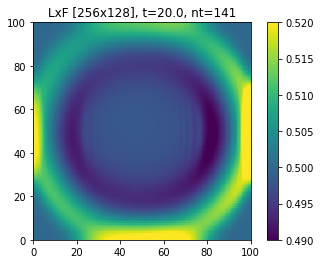

In [7]:
from GPUSimulators import LxF
importlib.reload(LxF)

with Common.Timer("construct") as t:
    sim = LxF.LxF(**arguments)

with Common.Timer("step") as t:
    t = sim.simulate(t_end)
    
with Common.Timer("download") as t:
    h1, hu1, hv1 = sim.download()

plot(sim)

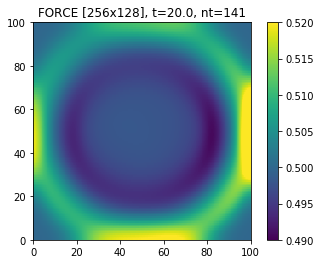

In [8]:
from GPUSimulators import FORCE
importlib.reload(FORCE)

with Common.Timer("construct") as t:
    sim = FORCE.FORCE(**arguments)

with Common.Timer("step") as t:
    t = sim.simulate(t_end)
    
with Common.Timer("download") as t:
    h1, hu1, hv1 = sim.download()

plot(sim)

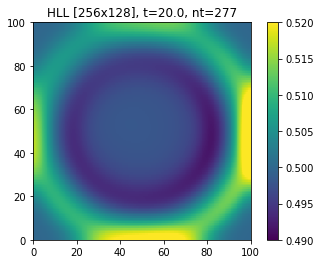

In [9]:
from GPUSimulators import HLL
importlib.reload(HLL)

with Common.Timer("construct") as t:
    sim = HLL.HLL(**arguments)

with Common.Timer("step") as t:
    t = sim.simulate(t_end)
    
with Common.Timer("download") as t:
    h1, hu1, hv1 = sim.download()

plot(sim)

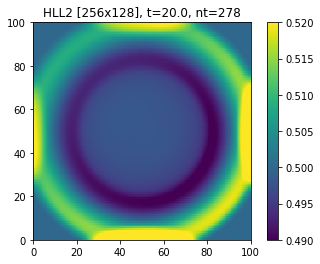

In [10]:
from GPUSimulators import HLL2
importlib.reload(HLL2)

with Common.Timer("construct") as t:
    sim = HLL2.HLL2(**arguments)

with Common.Timer("step") as t:
    t = sim.simulate(t_end)
    
with Common.Timer("download") as t:
    h1, hu1, hv1 = sim.download()

plot(sim)

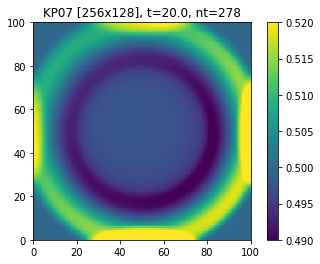

In [11]:
from GPUSimulators import KP07
importlib.reload(KP07)

with Common.Timer("construct") as t:
    sim = KP07.KP07(**arguments)

with Common.Timer("step") as t:
    t = sim.simulate(t_end)
    
with Common.Timer("download") as t:
    h1, hu1, hv1 = sim.download()

plot(sim)

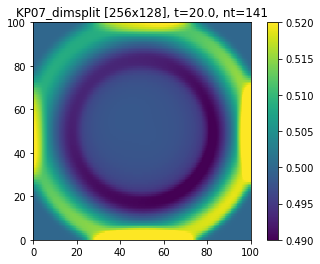

In [12]:
from GPUSimulators import KP07_dimsplit
importlib.reload(KP07_dimsplit)

with Common.Timer("construct") as t:
    sim = KP07_dimsplit.KP07_dimsplit(**arguments)

with Common.Timer("step") as t:
    t = sim.simulate(t_end)
    
with Common.Timer("download") as t:
    h1, hu1, hv1 = sim.download()

plot(sim)

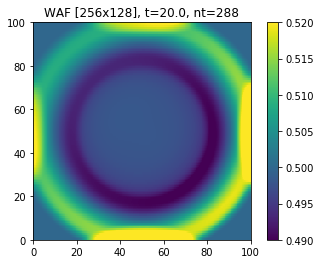

In [13]:
from GPUSimulators import WAF
importlib.reload(WAF)

with Common.Timer("construct") as t:
    sim = WAF.WAF(**arguments)

with Common.Timer("step") as t:
    t = sim.simulate(t_end)
    
with Common.Timer("download") as t:
    h1, hu1, hv1 = sim.download()

plot(sim)